# Data Visualization of Ice Coverage Extent

This case deals entirely with presentation of a single variable: the monthly extent of ice coverage in the Arctic ocean, a widely-used and highly visible impact of climate change over time. The dataset begins in 1978 and extends to March 2018.

# Warm-Up Tasks


In [ ]:
# import the dataset
from google.colab import files
files.upload()

Saving Arctic Sea Ice Extent.csv to Arctic Sea Ice Extent.csv


{'Arctic Sea Ice Extent.csv': b'Date,Extent,,,\r\n10/26/78,10.231,,,\r\n10/28/78,10.42,,,\r\n10/30/78,10.557,,,\r\n11/1/78,10.67,,,\r\n11/3/78,10.777,,,\r\n11/5/78,10.968,,,\r\n11/7/78,11.08,,,\r\n11/9/78,11.189,,,\r\n11/11/78,11.314,,,\r\n11/13/78,11.46,,,\r\n11/15/78,11.539,,,\r\n11/17/78,11.696,,,\r\n11/19/78,11.87,,,\r\n11/21/78,12.053,,,\r\n11/23/78,12.274,,,\r\n11/25/78,12.441,,,\r\n11/27/78,12.662,,,\r\n11/29/78,12.684,,,\r\n12/1/78,12.725,,,\r\n12/3/78,12.66,,,\r\n12/5/78,12.785,,,\r\n12/7/78,13.051,,,\r\n12/9/78,13.143,,,\r\n12/11/78,13.437,,,\r\n12/13/78,13.603,,,\r\n12/15/78,13.649,,,\r\n12/17/78,13.807,,,\r\n12/19/78,13.892,,,\r\n12/21/78,13.996,,,\r\n12/23/78,14.189,,,\r\n12/25/78,14.268,,,\r\n12/27/78,14.383,,,\r\n12/29/78,14.5,,,\r\n12/31/78,14.585,,,\r\n1/2/79,14.997,,,\r\n1/4/79,14.922,,,\r\n1/6/79,14.929,,,\r\n1/8/79,14.968,,,\r\n1/10/79,15.19,,,\r\n1/12/79,15.327,,,\r\n1/14/79,15.352,,,\r\n1/16/79,15.5,,,\r\n1/18/79,15.517,,,\r\n1/20/79,15.709,,,\r\n1/22/79,15.679,,,

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    'Arctic Sea Ice Extent.csv',
    index_col = 'Date',
    usecols = [0,1],
    parse_dates = True)
df

,Extent
Date,
1978-10-26,10.231
1978-10-28,10.420
1978-10-30,10.557
1978-11-01,10.670
1978-11-03,10.777
...,...
2018-03-27,14.256
2018-03-28,14.302
2018-03-29,14.238


## Figure 1: Overall Trendline 
Generate a line chart with an X axis that extends over the full time period from 1978 to 2018. Plot the full sea ice extent dataset in a single figure, with appropriate labels, axes, and color schemes (sometimes, defaults are fine - you don't need to custom modify every setting).

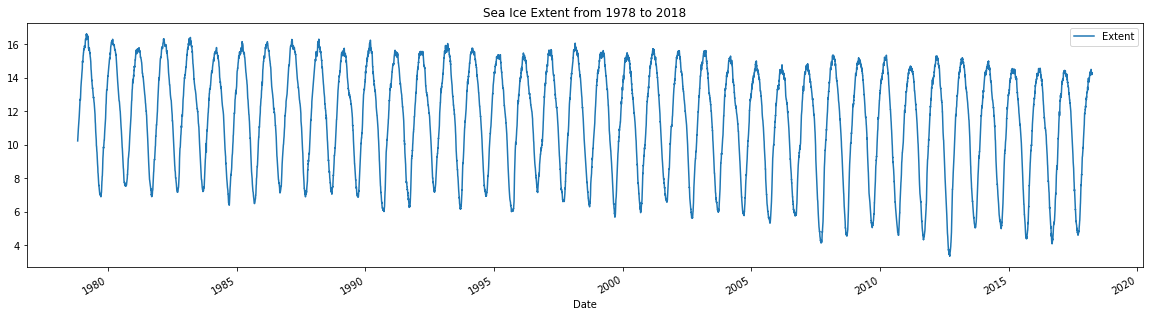

In [ ]:
df.plot(
    kind='line',
    y='Extent',
    figsize=(20, 5),
    title='Sea Ice Extent from 1978 to 2018'
)

## Dataframe Generation: Monthly Averages 

Generate a new dataframe `monthly_df` with one row per month, from October 1978 to March 2018. Each row should contain the following five columns:
   * Month
   * Year
   * Minimum Extent
   * Mean Extent
   * Maximum Extent


In [ ]:
# find out the min, mean, max for each month
monthly_df = df.groupby(
    pd.Grouper(freq = 'M'))['Extent'].agg(['min', 'mean', 'max'])

# add the columns - Month and Year
monthly_df = monthly_df \
              .rename(columns = {'min': 'Minimum Extent', 'mean': 'Mean Extent', 'max': 'Maximum Extent'})\
              .assign(
                      Month = monthly_df.index.month,
                      Year = monthly_df.index.year)

# adjust the output
monthly_df = monthly_df[['Month', 'Year', 'Minimum Extent', 'Mean Extent', 'Maximum Extent']]

monthly_df

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent
Date,,,,,
1978-10-31,10,1978,10.231,10.402667,10.557
1978-11-30,11,1978,10.670,11.645133,12.684
1978-12-31,12,1978,12.660,13.667063,14.585
1979-01-31,1,1979,14.922,15.414000,15.912
1979-02-28,2,1979,15.801,16.175286,16.579
...,...,...,...,...,...
2017-11-30,11,2017,8.193,9.457767,10.582
2017-12-31,12,2017,10.785,11.752387,12.418
2018-01-31,1,2018,12.491,13.056645,13.594


## Deviation from Baseline

For each month (January through December), calculate the mean extent of arctic sea ice in that month for the first 10 years of our data (1978-1987). Store these values in a dictionary or dataframe named `monthly_baselines`.

Then, create a new column `deviation_from_baseline` in `monthly_df` with the following values:
   * `None` or `NaN` for each row from October 1978 to December 1987.
   * The difference between the monthly mean and the monthly baseline, for each row from January 1988 to March 2018.


In [ ]:
# create monthly_baselines
monthly_baselines = pd.DataFrame(
  df.assign(
      Month = df.index.month,
      Year = df.index.year
  )['1978':'1987']\
    .groupby('Month', axis = 0)['Extent'].mean()
)
monthly_baselines

,Extent
Month,
1,14.928331
2,15.808598
3,15.930150
4,15.240504
5,13.737928
6,12.307600
7,10.201193
8,7.858566
9,7.202393


In [ ]:
# for record between 1978 and 1987
a = monthly_df['1978':'1987'].assign(deviation_from_baseline = 'None')

# for record between 1988 and 2013
b = monthly_df['1988':'2018']\
          .reset_index()\
          .merge(monthly_baselines, on ='Month', how = 'left')\
          .set_index('Date')

b = b.assign(
    deviation_from_baseline = b['Mean Extent'] - b['Extent']
)

b = b[['Month', 'Year', 'Minimum Extent', 'Mean Extent', 'Maximum Extent', 'deviation_from_baseline']]

# combine two tables above
monthly_df = [a,b]
monthly_df = pd.concat(monthly_df)

#output
monthly_df.to_csv('Yixuan Li - monthly_df.csv')
files.download('Yixuan Li - monthly_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
monthly_df

,Month,Year,Minimum Extent,Mean Extent,Maximum Extent,deviation_from_baseline
Date,,,,,,
1978-10-31,10,1978,10.231,10.402667,10.557,None
1978-11-30,11,1978,10.670,11.645133,12.684,None
1978-12-31,12,1978,12.660,13.667063,14.585,None
1979-01-31,1,1979,14.922,15.414000,15.912,None
1979-02-28,2,1979,15.801,16.175286,16.579,None
...,...,...,...,...,...,...
2017-11-30,11,2017,8.193,9.457767,10.582,-1.79277
2017-12-31,12,2017,10.785,11.752387,12.418,-1.58347
2018-01-31,1,2018,12.491,13.056645,13.594,-1.87169


# Part 2: Creative Visualization 

Choose two of the following three figure generation tasks. You may leave the third task blank or delete it from your submitted notebook.

For 10 points per task, use a combination of color, alpha, size, orientation, and shape parameters to make each figure readable and intuitive and to clearly visualize the change in sea ice extent over time. Consider the sample images from the Canvas assignment as inspiration for your approach.

Then, for 5 points per task, thoroughly describe in writing each visualization choice that you made for the final figure above. What combination of visual settings were most appropriate for this data, and what alternatives did you have? To assist your explanation, you might include code and a generated image for at least one alternative choice that you could have made, then explain why your chosen figure is a better option for presenting this data. 

## Figure Task 1: Year-Over-Year Percent Trends

On a single figure, graph a scatter plot. Each **month** in the sea ice dataset should be represented as a single point in the scatter plot. The Y axis for this scatter plot should represent **year-over-year percent change**. For instance, if the monthly average for February of one year is 16 and the next year is 15.5, the year-over-year percent change would be -3.125%. 

Choose an appropriate X axis to visualize this data clearly; explain this axis in your written description of the choices you made when designing this figure.

In [ ]:
# pick out the values
table_1 = monthly_df[['Month','Year','Mean Extent']]\
                    .pivot(index = 'Month', columns = 'Year', values = 'Mean Extent')
table_1

Year,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,15.414000,14.861875,14.909688,15.176733,14.942437,14.473267,14.724867,14.889625,14.969800,15.090474,14.954806,14.782613,14.363806,14.642677,14.896065,14.729774,14.586387,14.180871,14.417484,14.720516,14.359387,14.220355,14.202613,14.272613,14.390839,14.026419,13.661452,13.465581,13.703032,13.887258,13.913710,13.739065,13.463968,13.729419,13.702645,13.647484,13.602323,13.472516,13.174065,13.056645
2,NaN,16.175286,15.955143,15.604071,15.973500,16.006143,15.298933,15.465714,15.784857,16.050143,15.583379,15.495536,15.578214,15.249393,15.462103,15.685643,15.561893,15.225679,15.154828,15.436714,15.745821,15.308929,15.141483,15.211143,15.342357,15.193143,14.914379,14.372857,14.324964,14.513250,14.953448,14.811536,14.581429,14.363036,14.553345,14.723536,14.417571,14.400643,14.210345,14.111750,13.945893
3,NaN,16.341938,16.041313,15.631533,16.043875,16.085267,15.584200,15.885938,15.909467,15.815937,15.957226,15.423290,15.866742,15.416129,15.481129,15.813161,15.553613,15.260161,15.122806,15.467516,15.598097,15.397677,15.224839,15.516323,15.348903,15.484903,14.992581,14.686613,14.420968,14.542097,15.178903,14.983613,15.136710,14.546516,15.196258,15.032032,14.757516,14.370516,14.404871,14.273000,14.298323
4,NaN,15.446800,15.429067,15.009933,15.466000,15.172067,15.014467,15.356533,15.058800,15.210867,15.123333,14.328400,14.650067,14.859733,14.676900,15.077200,14.888033,14.448600,14.215867,14.563033,14.891933,15.083900,14.558167,14.856833,14.299433,14.512067,13.987333,14.089833,13.905867,13.845200,14.351933,14.495633,14.658733,14.107800,14.625767,14.298733,14.087867,13.893167,13.693967,13.760267,NaN
5,NaN,13.856867,13.792600,13.801625,13.973200,13.491312,13.576687,14.073400,13.379563,13.742933,13.560871,13.044129,13.225839,13.473129,13.215548,13.368226,13.624387,12.972065,13.094548,13.177161,13.589839,13.750968,13.152677,13.509613,12.970613,13.016065,12.558419,12.911097,12.517355,12.779677,12.974000,13.186710,12.866097,12.680774,13.011806,12.997258,12.700710,12.468097,11.899871,12.616484,NaN
6,NaN,12.530000,12.204600,12.429733,12.476067,12.295667,12.151667,12.219067,11.975933,12.485667,11.943433,12.244533,11.640567,12.108033,12.146767,11.870900,12.016400,11.440433,12.083833,11.738367,11.705700,11.779167,11.665233,11.455933,11.583400,11.604033,11.447067,11.162033,10.919500,11.220067,11.208333,11.320267,10.585100,10.748667,10.674533,11.360133,11.032600,10.878900,10.352567,10.720133,NaN
7,NaN,10.311250,10.100062,10.271000,10.367063,10.570267,9.977533,9.744563,10.146467,10.332563,9.808677,10.129710,9.246613,9.514032,10.323129,9.476355,9.925161,8.987097,10.164258,9.410839,9.415161,9.488290,9.513000,9.070355,9.274161,9.214774,9.431355,8.648742,8.459839,7.942839,8.677935,8.465452,8.074677,7.724387,7.671774,8.131677,8.108452,8.377871,7.893903,7.900613,NaN
8,NaN,8.041067,7.984267,7.844313,8.139533,8.185875,7.771062,7.401867,7.979563,7.499905,7.891581,7.881774,6.797484,7.415355,7.925258,7.335000,7.639290,6.744355,8.180452,7.285032,7.508871,7.225581,7.168323,7.460806,6.599000,6.935871,6.854839,6.301129,6.495613,5.342323,5.913065,6.135742,5.874903,5.502452,4.723290,6.013516,6.077871,5.598742,5.387774,5.472323,NaN
9,NaN,7.051133,7.667067,7.138467,7.301733,7.394600,6.805200,6.697667,7.410667,7.278700,7.369000,7.008333,6.142800,6.472900,7.473700,6.396667,7.137600,6.080133,7.582533,6.686333,6.536033,6.116867,6.246067,6.732167,5.827133,6.116100,5.984500,5.503767,5.862433,4.267267,4.687433,5.261633,4.865067,4.561333,3.565600,5.208267,5.219933,4.615767,4.505067,4.796500,NaN


In [ ]:
# calculate the change percentage
table_1_pct = table_1.pct_change(axis = 'columns')
table_1_pct = table_1_pct.reset_index()
table_1_pct

Year,Month,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,NaN,NaN,-0.035820,0.003217,0.017911,-0.015438,-0.031399,0.017384,0.011189,0.005385,0.008061,-0.008990,-0.011514,-0.028331,0.019415,0.017305,-0.011163,-0.009735,-0.027801,0.016685,0.021018,-0.024532,-0.009682,-0.001248,0.004929,0.008283,-0.025323,-0.026020,-0.014337,0.017634,0.013444,0.001905,-0.012552,-0.020023,0.019716,-0.001950,-0.004026,-0.003309,-0.009543,-0.022153,-0.008913
1,2,NaN,NaN,-0.013610,-0.022004,0.023675,0.002044,-0.044184,0.010901,0.020636,0.016806,-0.029082,-0.005637,0.005336,-0.021108,0.013949,0.014457,-0.007889,-0.021605,-0.004653,0.018600,0.020024,-0.027747,-0.010938,0.004601,0.008626,-0.009726,-0.018348,-0.036309,-0.003332,0.013144,0.030331,-0.009490,-0.015536,-0.014977,0.013250,0.011694,-0.020781,-0.001174,-0.013215,-0.006938,-0.011753
2,3,NaN,NaN,-0.018396,-0.025545,0.026379,0.002580,-0.031151,0.019362,0.001481,-0.005879,0.008933,-0.033460,0.028752,-0.028400,0.004216,0.021448,-0.016413,-0.018867,-0.009001,0.022794,0.008442,-0.012849,-0.011225,0.019145,-0.010790,0.008861,-0.031794,-0.020408,-0.018088,0.008400,0.043791,-0.012866,0.010218,-0.038991,0.044666,-0.010807,-0.018262,-0.026224,0.002391,-0.009155,0.001774
3,4,NaN,NaN,-0.001148,-0.027165,0.030384,-0.019005,-0.010388,0.022782,-0.019388,0.010098,-0.005755,-0.052563,0.022450,0.014312,-0.012304,0.027274,-0.012547,-0.029516,-0.016108,0.024421,0.022585,0.012891,-0.034854,0.020515,-0.037518,0.014870,-0.036158,0.007328,-0.013057,-0.004363,0.036600,0.010013,0.011252,-0.037584,0.036715,-0.022360,-0.014747,-0.013820,-0.014338,0.004842,0.000000
4,5,NaN,NaN,-0.004638,0.000654,0.012432,-0.034487,0.006328,0.036586,-0.049301,0.027159,-0.013248,-0.038105,0.013930,0.018698,-0.019118,0.011553,0.019162,-0.047879,0.009442,0.006309,0.031318,0.011857,-0.043509,0.027138,-0.039898,0.003504,-0.035160,0.028083,-0.030496,0.020957,0.015206,0.016395,-0.024313,-0.014404,0.026105,-0.001118,-0.022816,-0.018315,-0.045574,0.060220,0.000000
5,6,NaN,NaN,-0.025970,0.018447,0.003728,-0.014460,-0.011711,0.005547,-0.019898,0.042563,-0.043428,0.025211,-0.049325,0.040158,0.003199,-0.022711,0.012257,-0.047932,0.056239,-0.028589,-0.002783,0.006276,-0.009672,-0.017942,0.011127,0.001781,-0.013527,-0.024900,-0.021728,0.027526,-0.001046,0.009987,-0.064943,0.015453,-0.006897,0.064228,-0.028832,-0.013931,-0.048381,0.035505,0.000000
6,7,NaN,NaN,-0.020481,0.016924,0.009353,0.019601,-0.056076,-0.023350,0.041244,0.018341,-0.050702,0.032729,-0.087179,0.028921,0.085042,-0.082027,0.047361,-0.094514,0.130983,-0.074124,0.000459,0.007767,0.002604,-0.046531,0.022470,-0.006404,0.023504,-0.082980,-0.021842,-0.061112,0.092548,-0.024486,-0.046161,-0.043381,-0.006811,0.059947,-0.002856,0.033227,-0.057767,0.000850,0.000000
7,8,NaN,NaN,-0.007064,-0.017529,0.037635,0.005693,-0.050674,-0.047509,0.078047,-0.060111,0.052224,-0.001243,-0.137569,0.090897,0.068763,-0.074478,0.041485,-0.117149,0.212933,-0.109458,0.030726,-0.037727,-0.007924,0.040802,-0.115511,0.051049,-0.011683,-0.080776,0.030865,-0.177549,0.106834,0.037659,-0.042511,-0.063397,-0.141603,0.273163,0.010702,-0.078832,-0.037681,0.015693,0.000000
8,9,NaN,NaN,0.087352,-0.068944,0.022871,0.012718,-0.079707,-0.015802,0.106455,-0.017808,0.012406,-0.048944,-0.123501,0.053738,0.154614,-0.144110,0.115831,-0.148154,0.247100,-0.118193,-0.022479,-0.064132,0.021122,0.077825,-0.134434,0.049590,-0.021517,-0.080330,0.065167,-0.272100,0.098463,0.122498,-0.075369,-0.062431,-0.218299,0.460699,0.002240,-0.115742,-0.023983,0.064690,0.000000
9,10,NaN,-0.159068,0.049705,-0.035554,0.063774,-0.009234,-0.082865,-0.001713,0.109759,-0.045884,0.009533,-0.033512,-0.038959,0.006657,0.091097,-0.057233,0.014701,-0.121853,0.170142,-0.089993,0.013833,0.017858,-0.025967,-0.009682,-0.016436,-0.038424,0.009811,-0.072341,0.025725,-0.199094,0.216925,-0.058443,0.009188,-0.074365,-0.089

In [ ]:
# make the above table to format that could be easily plot
tb1 = pd.melt(table_1_pct, id_vars= 'Month', value_name= 'YoY')
tb1[['Month','Year']] = tb1[['Month','Year']].astype(str)
tb1 = tb1\
        .assign(Mon_Year = tb1['Month'].str.cat(tb1['Year'], sep = '-'))\
        .reset_index()[['Mon_Year','YoY']]
tb1

,Mon_Year,YoY
0,1-1978,NaN
1,2-1978,NaN
2,3-1978,NaN
3,4-1978,NaN
4,5-1978,NaN
...,...,...
487,8-2018,0.0
488,9-2018,0.0
489,10-2018,0.0
490,11-2018,0.0


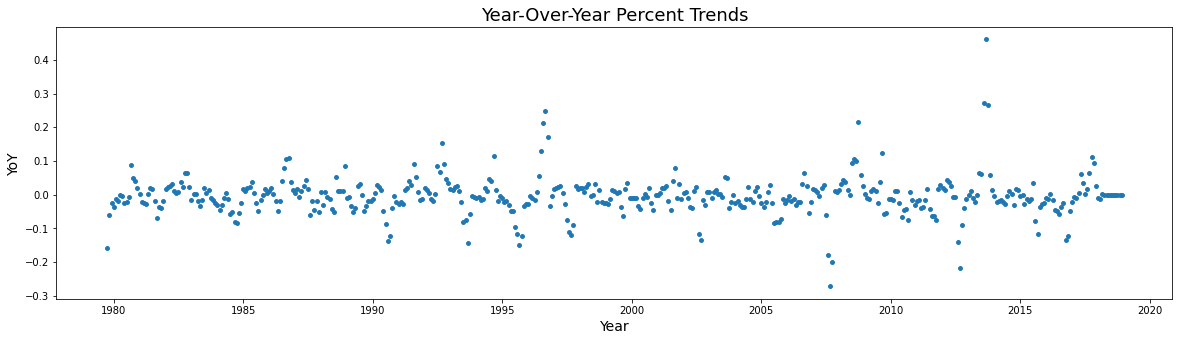

In [ ]:
x = pd.to_datetime(tb1['Mon_Year'])
y = tb1['YoY']

plt.figure(figsize=(20,5))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('YoY', fontsize = 14)
plt.title('Year-Over-Year Percent Trends', fontsize = 18)
plt.scatter(x,y,s=15)
plt.savefig('Yixuan Li - Figure_Task_1.png')
plt.show()

##### Description


For the x-axis, I choose year as the xticks, which represents the yoy growth rate compared to the last year. For example, the 1980 scale represents the year-on-year growth rate in 1980 relative to 1979 and the formula is [(data of 1987 - data of 1979) / data of 1979].

For an alternative, line chart can also be used. And the code and output is as follows: 

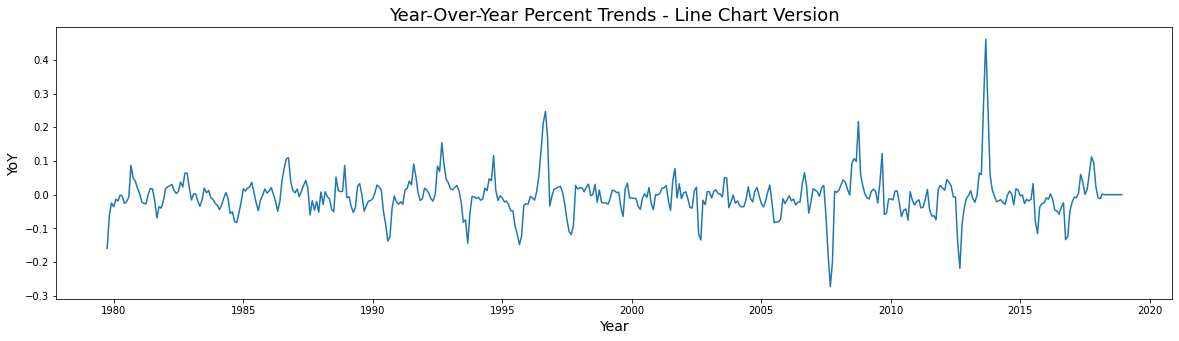

In [ ]:
# draw the alternative figure - line chart
x = pd.to_datetime(tb1['Mon_Year'])
y = tb1['YoY']

plt.figure(figsize=(20,5))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('YoY', fontsize = 14)
plt.title('Year-Over-Year Percent Trends - Line Chart Version', fontsize = 18)
plt.plot(x,y)
plt.show()

I think it is more appropriate to use a scatter chart for each time point, because we don’t know whether the data fluctuates between two time points. In the case of using a line chart, it is assumed that there is no fluctuation between the two time points, but a monotonous rise or fall. In order not to cause misunderstandings to readers, I choose to use scatter plots.

## Figure Task 2: Annual Trends over Time

On a single figure, graph separate line plots for each year from 1978 to 2018. The X axis should be marked with 12 ticks from "January" to "December". Each year's line should span the full width of the figure. The specific data points included your figure may be either individual daily data points or monthly averages (or something else, if you have another idea).

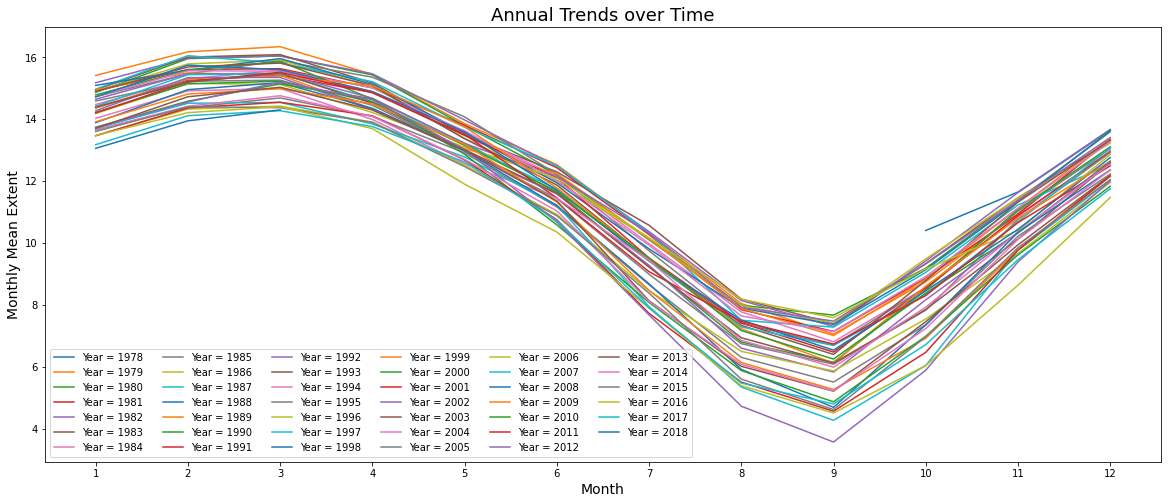

In [ ]:
# use monthly averages as the data points
tb2 = monthly_df.reset_index()[['Month', 'Year', 'Mean Extent']]

fig, ax = plt.subplots(figsize = (20, 8))
plt.xticks(np.unique(tb2.Month))
for i in tb2.Year.unique():
    tb2[tb2['Year']==i].plot.line(
        x='Month', 
        y='Mean Extent', 
        ax=ax, 
        label='Year = %s'%i)
plt.title('Annual Trends over Time', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Monthly Mean Extent', fontsize = 14)
plt.legend(loc = 0, ncol = 6)
plt.savefig('Yixuan Li - Figure_Task_2.png')
plt.show()

##### Description

I choose to put all the lines in one single graph, which can help us see the general trend in a year and reflects the seasonal changes in sea ice extent.

For an alternative, scatter plot can also be used. The code and output as are follows: 

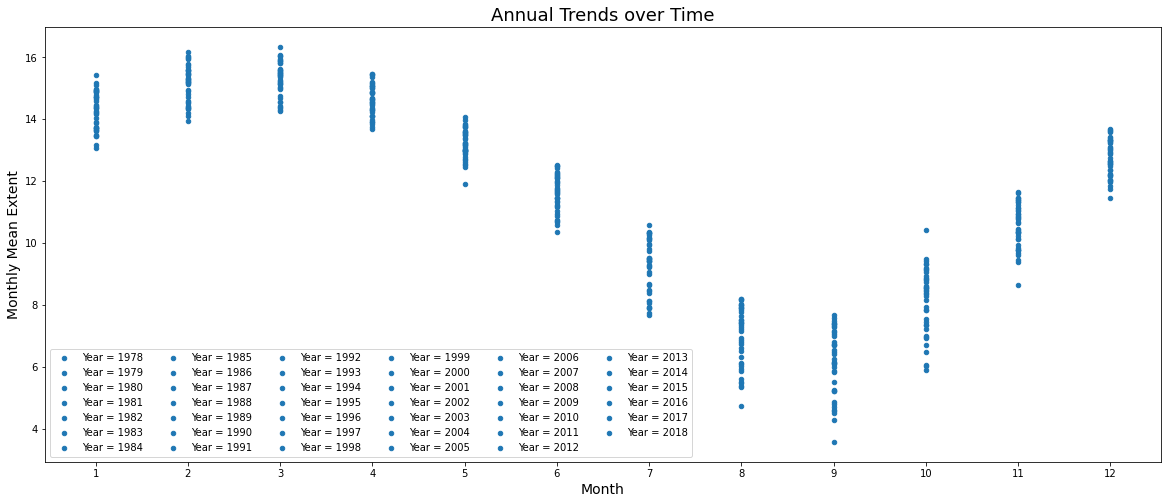

In [ ]:
# draw the alternative figure - seperate each line chart
fig, ax = plt.subplots(figsize = (20, 8))
plt.xticks(np.unique(tb2.Month))
for i in tb2.Year.unique():
    tb2[tb2['Year']==i].plot.scatter(
        x='Month', 
        y='Mean Extent', 
        ax=ax, 
        label='Year = %s'%i)
plt.title('Annual Trends over Time', fontsize = 18)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Monthly Mean Extent', fontsize = 14)
plt.legend(loc = 0, ncol = 6)
plt.show()

Compared with the line chart, the scatter chart can only observe the overall trend of the month, but there is no way to compare the difference between the year and the year, because all the points are a color, which is not good for the reader to compare the difference between the years. . Therefore, a line chart is a better choice.

# Part 3: Discussion

Regardless of whether you have worked in data visualization in the past or not, this is likely your first time working with Matplotlib specifically. Now that you have some experience with the library:
   * What specific tasks or settings are harder to modify than you expected? 
   * On the other hand, which tasks are easier than you expected? 
   * What additional ways of displaying data you would want to see, but don't yet know how to do in Python?



*   I think it is hard to finish Figure_task_2 to put all year's data in one figure. Although I found the solution to do so, I don't think the output is beautiful and readable enough. Also, I met some difficult in plotting with a pivot table. This function is easy enough in Excel with some bottons, but harder in Python. 
*   I think it is easy to draw plots and give them some setting if we have succeeded in processing data before using Matplotlib. It is easy enough to enter just line, scatter, bar or any charts we want to draw.  
*   I have not exercised in combining histograms and line charts together, such as histogram representing the absolute value and line charts representing the growth rate, or somthing like that. Also, I have not been exposed to how to draw some 3D graphs or dynamic graphs.




